## Wine classification (Tree, RandomForest, LogisticR)

### Source:

*Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009*

### Data Set Information:

*The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).*

*These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.*

### Attribute Information:

*For more information, read [Cortez et al., 2009].*

*Input variables (based on physicochemical tests):*

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

*Output variable (based on sensory data):*

12 - quality (score between 0 and 10)

<font color ='red'> To learn more see: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

## Procedures and goals

- Load the data frame, visualization of histograms and correlations, to understand the important features
- Machine learning to classify the quality of wines. In order: Tree, RandomForest, and LogisticRegression
- We filter features to use Tree and RandomForest machine learning techniques
- For the two first models we explore the mean_error and grid_search to find out the best parameter and avoid underfitting and overfitting. 
 To do that, we plot the score versus the depth of the tree to find out the parameter value that avoids underfitting and overfitting.
  On the other hand, we plot error_function to determine the depth parameter and compare it with the value determined by 
  the mean_train_score and mean_val_score curve. We show that values match perfectly.
  -For LogisticR we consider all features and the grid search to tuning parameter C.

# Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score
#from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as mt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LogisticRegression

#from mlxtend.plotting import plot_decision_regions


In [2]:
df = pd.read_csv('/home/maike/Documents/ICTP/Database Wine/winequality-red.csv', sep = ",").astype(float)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:
#df_Q = pd.DataFrame(list_bom_ruim)
#df_n = pd.concat([df, df_Q], axis=1).rename(columns={0:'Class'})
df.describe().style.background_gradient(cmap = "YlGn")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Observation:
These quantities are important to understand the max and min values, etc. Behind these values, we have a distribution that can be visualized by a histogram plot. 

Below we have all the histograms.

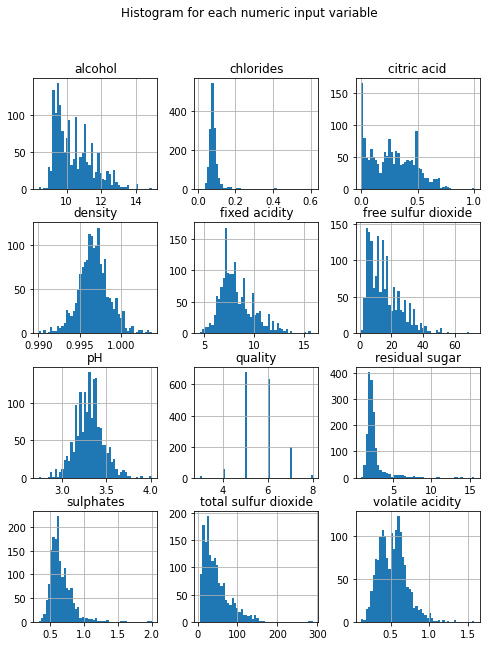

In [76]:
import pylab as pl
df.hist(bins=50, figsize=(8,10))#drop(['Class'],axis=1)
pl.suptitle("Histogram for each numeric input variable")
plt.show()

Histrograms it is important to check the outlier's existence and to see the shape of distributions.
- Density has a gaussian shape (apparently) and volatile present a bimodal behavior (two peaks)
- There are few wines with high values of alcohol  (>13)

### Below we have the Pie plot

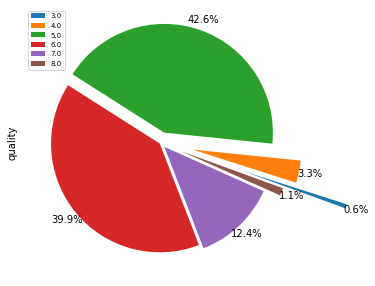

In [4]:
quality_pie = df["quality"].value_counts().sort_index(ascending=True)

explode_list = [0.8,0.3,0.1,0.01,0.05,0.2]
ax = quality_pie.plot(kind='pie', figsize = (7,5),autopct='%1.1f%%',pctdistance=1.1,startangle=-20,labels=None,explode=explode_list,textprops={'fontsize': 10})
plt.legend(labels=quality_pie.index, loc="upper left", fontsize=7);



# "pctdistance" put the percentages out of pie plot
# "autopct" introduce percentages
# "startangle" control the angles
# "explode" we have  

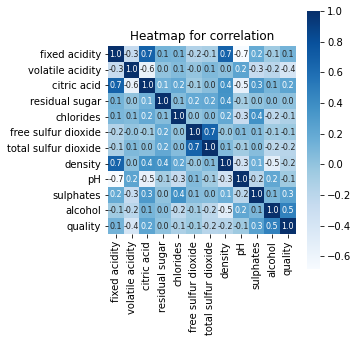

In [6]:
plt.figure(figsize=(5,5))
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Heatmap for correlation")

plt.savefig('Heatmap_wine.png',format="png")


plt.tight_layout()
plt.show()


### Obsarvations on heatmap:
    - High correlation between quality and alcohol
    - Alcohol has less correlation to density
    - Highest anti-correlation occurs between fixed acidity & pH
    - Highest correlation occurs among (citric acid & fixed acidity), (density & fixed acidity) and (total s. diox & free s. diox )
    - Zero correlation between quality and residual sugar

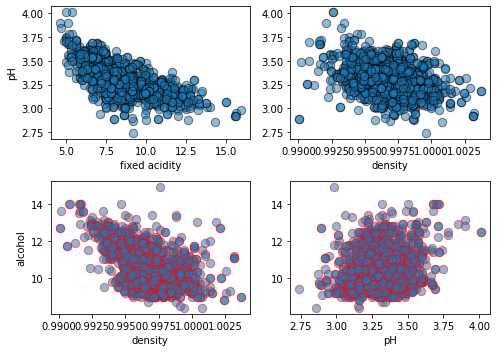

In [225]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7,5))


ax1.scatter(df['fixed acidity'], df['pH'], s=70, alpha=0.5, edgecolors="k")
ax1.set(xlabel="fixed acidity", ylabel="pH")


ax2.scatter(df['density'], df['pH'], s=70, alpha=0.5, edgecolors="k")
ax2.set(xlabel="density", ylabel="")


ax3.scatter(df['density'], df['alcohol'], s=70, alpha=0.5, edgecolors="red")
ax3.set(xlabel="density", ylabel="alcohol")


ax4.scatter(df['pH'], df['alcohol'], s=70, alpha=0.5, edgecolors="red")
ax4.set(xlabel="pH", ylabel="")


# Set logarithmic scale on the x variable
ax1.set_xscale("linear");
ax1.set_yscale("linear");

ax2.set_xscale("linear");
ax2.set_yscale("linear");

ax3.set_xscale("linear");
ax4.set_yscale("linear");

plt.tight_layout()
plt.show()


### *Observations*

The correlation between alcohol and pH apparently are important features, so we did scatter plot using that. 
  - For high Alcohol percentage we have high pH and low density
  - For high pH values we have low fixed acidity and low density

# Tree 
#### Machine

### Filtering the best features for tree

In [148]:
from sklearn.tree import DecisionTreeClassifier

y = df['quality']
X = df.drop(['quality'],axis=1)

Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)
#We we change the random_state value we also change the main features!

method = DecisionTreeClassifier()
method.fit(Xtrain,ytrain)
y_pred = method.predict(Xval)
list_name = []
list_score = []
list_drop_tree = []
for name, score in zip(X.columns,method.feature_importances_):
    list_score.append(score)
    list_name.append(name)
#list_name#.append('quality')
#list_score#.append(100)
df_features = pd.DataFrame(list_score, index=list_name, columns=['Importance (score)'])
df_features = df_features.sort_values(by=['Importance (score)'],ascending=False)
list_drop_tree = list(df_features.index)[6:] #We are considering only 7 first features
list_drop_tree.append('quality') 
df_features

,Importance (score)
alcohol,0.147500
sulphates,0.130411
total sulfur dioxide,0.130377
volatile acidity,0.099534
residual sugar,0.080765
pH,0.077322
density,0.077280
chlorides,0.076610
fixed acidity,0.075702
free sulfur dioxide,0.057696


In [122]:
list_drop_tree #List of features to drop

['density', 'free sulfur dioxide', 'pH', 'chlorides', 'citric acid', 'quality']

#### Applying DecisionTreeClassifier

In [142]:
y = df['quality']
X = df.drop(list_drop_tree,axis=1)

Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)


tree = DecisionTreeClassifier(random_state=5,max_depth=17, max_leaf_nodes=31)
tree.fit( Xtrain, ytrain)
ypred_val = tree.predict(Xval)


print(f"Accuracy validation data: {accuracy_score(yval, ypred_val)}")
print("Absolut_error: %.2f" % mean_absolute_error(yval, ypred_val))
#print("Absolut_error of train: %.2f" % mean_absolute_error(ytrain, ypred_train))
print("Coefficient of determination r2_score: %.2f6" % r2_score(yval, ypred_val))


Accuracy validation data: 0.58125
Absolut_error: 0.47
Coefficient of determination r2_score: 0.096


#### <font color ='red'> The choices: max_depth=17 & max_leaf_nodes=31, will be explained in the "*best parameters*" section.

In [146]:
accuracy_dataframe = pd.DataFrame({"y_val": yval, "ypred_val": ypred_val})
accuracy_dataframe[:5] # some validation data to compare

,y_val,ypred_val
236,6.0,6.0
833,4.0,5.0
424,5.0,6.0
982,6.0,6.0
1155,5.0,5.0


#### *validation vs. prediction (histogram)*

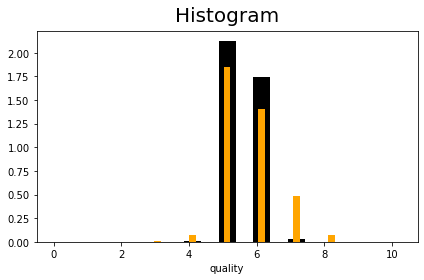

In [226]:
bins = np.linspace(0, 10, 40) # intervalo e número de bins 

hist1, _ = np.histogram(ypred_val, bins=bins,density='True')
hist2, _ = np.histogram(yval, bins=bins,density='True')
plt.bar( bins[1:], hist1 , color ='black', width = 0.5) # prediction
plt.bar( bins[1:], hist2, color = 'orange', width = 0.2) # validation


plt.xlabel('quality')
plt.title('Histogram', pad=10, size=20)

plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()

### *Best parameters*
*Using GridSearch and mean_squared_error*
It is important to check the mean_squared_error and gridS, to ensure that we are avoing overfitting and underfitting!

In [132]:
param_grid = {'max_depth':range(1, 25)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid=param_grid,cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'max_depth': range(1, 25)}, return_train_score=True)

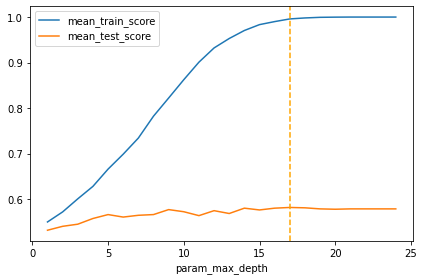

In [134]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.axvline(x=17, color='orange', linestyle='--')
plt.legend()
plt.tight_layout()


In [130]:
grid.best_params_

{'max_depth': 17}

/home/maike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 245.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/maike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/maike/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/home/maike/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either

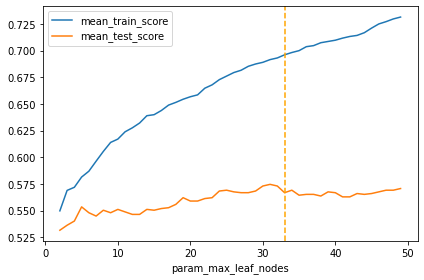

In [135]:
param_grid = {'max_leaf_nodes': range(1, 50)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.axvline(x=33, color='orange', linestyle='--')

plt.legend()
plt.tight_layout()


In [136]:
grid.best_params_

{'max_leaf_nodes': 31}

In [147]:
grid.best_score_

0.5746691176470587

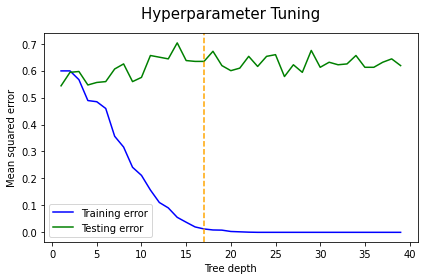

In [139]:

Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)

max_depths = range(1, 40,1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(Xtrain, ytrain)
    testing_error.append(mse(yval, model_2.predict(Xval)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=17, color='orange', linestyle='--')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

plt.tight_layout()

# Random Forest Classifier

### Filtering the features

In [227]:

y = df['quality']
X = df.drop(['quality'],axis=1)

Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)

method = RandomForestClassifier()
method.fit(Xtrain,ytrain)
y_pred = method.predict(Xval)
list_name = []
list_score = []
list_drop_tree = []
for name, score in zip(X.columns,method.feature_importances_):
    list_score.append(score*100)
    list_name.append(name)
#list_name#.append('quality')
#list_score#.append(100)
df_features = pd.DataFrame(list_score, index=list_name, columns=['Importance'])
df_features = df_features.sort_values(by=['Importance'],ascending=False)
list_drop_tree = list(df_features.index)[6:]
list_drop_tree.append('quality')
df_features

,Importance
alcohol,14.103547
sulphates,11.022389
total sulfur dioxide,10.609061
volatile acidity,10.167341
density,9.104857
chlorides,8.242066
fixed acidity,7.871316
pH,7.774041
citric acid,7.227318
residual sugar,7.012883


#### *Applying RandomForestClassifier*

In [228]:

y = df['quality']
X = df.drop(list_drop_tree,axis=1)

Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)

classifier = RandomForestClassifier(n_estimators=25, max_depth=17, random_state=20)
classifier_fit = classifier.fit( Xtrain, ytrain)
ypred_val = classifier.predict(Xval)
ypred_train = classifier.predict(Xtrain)


print(f"Test data accuracy : {accuracy_score(yval, ypred_val)}")


Test data accuracy : 0.7125


#### *validation vs. prediction (histogram)*

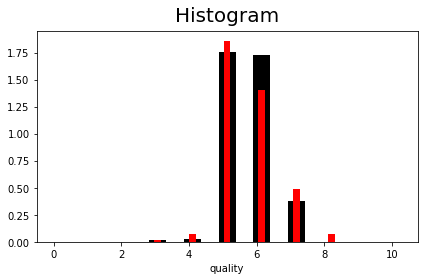

In [229]:
bins = np.linspace(0, 10, 40) # intervalo e número de bins 

hist1, _ = np.histogram(ypred_val, bins=bins,density='True')
hist2, _ = np.histogram(yval, bins=bins,density='True')
plt.bar( bins[1:], hist1 , color ='black', width = 0.5)
plt.bar( bins[1:], hist2, color = 'r', width = 0.2 )

plt.xlabel('quality')
plt.title('Histogram', pad=10, size=20)

plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()

### *Best parameters*
*Using GridSearch and mean_squared_error*

In [170]:
param_grid = {'n_estimators': range(1, 50)}
grid = GridSearchCV(RandomForestClassifier(random_state=20), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20),
             param_grid={'n_estimators': range(1, 50)},
             return_train_score=True)

Text(0.5, 0, 'param_n_estimators')

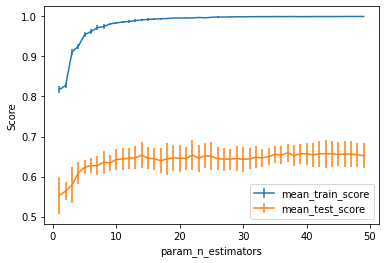

In [171]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_n_estimators', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_n_estimators', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.ylabel('Score',fontsize=10)
plt.xlabel('param_n_estimators',fontsize=10)



In [172]:
grid.best_params_

{'n_estimators': 37}

In [185]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1, 20)}
grid = GridSearchCV(RandomForestClassifier(random_state=20), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(Xtrain, ytrain)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20),
             param_grid={'max_depth': range(1, 20)}, return_train_score=True)

Text(0.5, 0, 'param_max_depth')

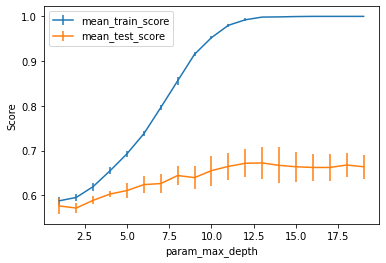

In [186]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.ylabel('Score',fontsize=10)
plt.xlabel('param_max_depth',fontsize=10)

In [187]:
grid.best_params_

{'max_depth': 13}

In [193]:
param_grid = {'max_depth': range(1, 50),
              'n_estimators': range(1, 50)
             }
grid = GridSearchCV(RandomForestClassifier(random_state=20), 
                    param_grid=param_grid,
                    cv=5,
                   return_train_score=True)

grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20),
             param_grid={'max_depth': range(1, 50),
                         'n_estimators': range(1, 50)},
             return_train_score=True)

In [194]:
grid.best_params_

{'max_depth': 17, 'n_estimators': 25}

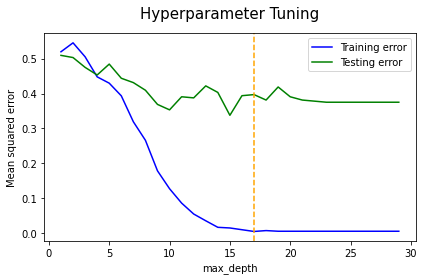

In [197]:
#Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)

max_depths = range(1, 30)
training_error = []
for max_depth in max_depths:
    model_1 = RandomForestClassifier(max_depth=max_depth, n_estimators=25,random_state=20)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = RandomForestClassifier(max_depth=max_depth, n_estimators=25,random_state=20)
    model_2.fit(Xtrain, ytrain)
    testing_error.append(mse(yval, model_2.predict(Xval)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('max_depth')
plt.axvline(x=17, color='orange', linestyle='--')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

plt.tight_layout()

# Logistic Regression

 We do not have importance_features_ command for Logistic regression

In [230]:
y = df['quality']
X = df.drop(['quality'],axis=1)

Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=5 , C = 0.39)
logreg_fit = logreg.fit( Xtrain, ytrain)
ypred_val = logreg.predict(Xval)
ypred_train = logreg.predict(Xtrain)


print(f"Test data accuracy : {accuracy_score(yval, ypred_val)}")


Test data accuracy : 0.609375


/home/maike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### *validation vs. prediction (histogram)*

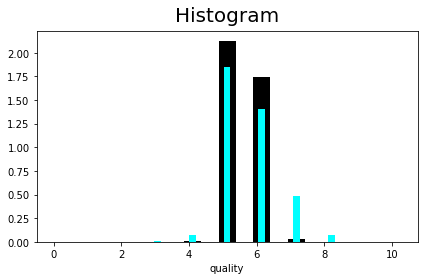

In [231]:
bins = np.linspace(0, 10, 40) # intervalo e número de bins 

hist1, _ = np.histogram(ypred_val, bins=bins,density='True')
hist2, _ = np.histogram(yval, bins=bins,density='True')
plt.bar( bins[1:], hist1 , color ='black', width = 0.5)
plt.bar( bins[1:], hist2, color = 'cyan', width = 0.2 )

plt.xlabel('quality')
plt.title('Histogram', pad=10, size=20)

plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()

### *Best parameter 'C'*
*Using GridSearch*

numbers = range(0, 100)
float_nums = []
for number in numbers:
    f = number / 100
    float_nums.append(f)
float_nums[:10]

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Xtrain, Xval, ytrain, yval = train_test_split(X, y,test_size=0.2,random_state=5)

scaler = StandardScaler().fit(Xtrain)
X_train_scaled = scaler.transform(Xtrain)



param_grid = {'C': float_nums}
param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid.fit(X_train_scaled, ytrain)

grid.best_params_,grid.best_score_

/home/maike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/maike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

({'C': 0.39}, 0.5832444852941177)

# Conclusion

$\ \ \ $  Usually the wine classifiers with this dataset consider "good" or "bad" wines. Here we consider more groups such as was shown in the pie_plot figure. We did a very quick analysis to get an overview, for instance, histograms and scatter plots. After the first part, by plotting the heatmap of the scatter plot, we had some idea of quantities that are more or less correlated, it is important because we machine reads these pieces of information too, and here we are thinking together to the machine (like in Noah Harari book).
  
$\ \ \ $ Ok, let us start our brief discussion on machine learning models in the wine dataset. We applied three classifiers, that give us the following scores:

    -Tree (score: 0.58125)
    -RandomForest (score: 0.7125)
    -LogistRegression (score: 0.609375)
So, RandomForest has the best performance. It is noteworthy that random_state in split function chance the main features, so it can influence substantially our machine learning. Beyond that, different features were considered for Tree and RandomForest,  while we considered all features for LogistRegression. In the case of all features being considered in Tree and RandomForest, we obtain lost performance (of order 0.1, which can be much!).

 Histograms of ypred_val (predicted) vs y_val for all machine learning classifiers were presented in this text. 
